
# Análise das intenções de voto da eleição presidencial de 2018

Renato Naville Watanabe
renato.watanabe@ufabc.edu.br

In [126]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [127]:
import pandas as pd
P = pd.read_csv('pesq.csv')
P

,dia,Alckmin,Haddad,Meirelles,Boulos,Marina,Ciro,Bolsonaro,Daciolo,Dias,Amoedo,Peso,STD,Identificação
0,14,9,7,2,1,11,8,23,1,5,1,1.0000,1.5,"'XP investimento 15/08',"
1,2,19,4,0,0,11,8,16,0,4,0,0.2200,1.5,"'Ibope, Estado SP',"
2,15,7,3,2,0,9,8,28,1,6,3,0.0018,1.5,"'Ibope, Estado AL',"
3,11,9,4,1,1,13,10,24,1,5,1,1.0000,1.5,"'Pesquisa Paraná',"
4,13,1,2,1,1,11,39,14,1,1,1,0.0400,1.5,"'Ibope, Estado CE, 16/08',"
5,7,10,3,2,0,12,8,23,0,4,0,1.0000,1.5,"'XP investimento 09/08',"
6,0,10,2,2,1,11,10,22,0,5,0,1.0000,1.5,"'XP investimento 01/08',"
7,17,7,6,1,1,10,8,21,0,3,1,1.0000,1.5,'CNT/MDA 20/08 - Votos dos can...
8,18,7,4,1,1,12,9,20,1,3,1,1.0000,1.5,"'Ibope Nacional 20/08',"
9,20,9,4,2,1,16,10,22,1,4,2,1.0000,1.5,"'Datafolha 22/08',"


In [128]:
candidatos = list(P)[1:11]
dia = np.array(P.dia)[5:]
pesquisa = np.array(P.iloc[5:,1:11])
peso = np.array(P.Peso)[5:]
W = np.diag(peso.astype(float))
std = np.array(P.STD)[5:]

diaEleicao = 68 #07 de outubro. Dia 01 é 01 de agosto.

## Estimativa por ajuste de polinômio

Talvez seja útil para ver tendências

In [129]:
# Estimativa

Y = np.round(np.array(pesquisa))

xValores = np.reshape(np.array(dia).T, (len(dia),1))
# máximo expoente do polinômio é igual ao número de semanas , arredondado para baixo, menos 1
# esse número está associado ao número máximo de mudanças de tendência permitidas no ajuste 
# (p. ex. em  3 semanas é permitido no máximo duas mudanças de tendências)
# Isso é feito para evitar o que é conhecido como overfitting.

maxExp = int(np.floor(np.max(dia)/7))

X = xValores**np.arange(0, maxExp+1)


Para encontrar os coeficientes dos polinômios que ajustam as intenções de cada candidato é utilizada a seguinte expressão:

$\beta = (X^TWX)^{-1}(X^TWY)$

In [130]:
beta = np.linalg.inv((X.T.dot(W)).dot(X)).dot(X.T.dot(W.dot(Y))) # regressão

In [131]:
ultimoDia = max(dia)
hoje = 44
tempo = np.reshape(np.linspace(10, ultimoDia,ultimoDia+1),(ultimoDia+1,1))
tempoMatriz = tempo**[np.arange(0,maxExp+1)]
tempo2 = np.reshape(np.linspace(ultimoDia, hoje, hoje-ultimoDia+1),(hoje-ultimoDia+1,1))
tempoMatriz2 = tempo2**[np.arange(0,maxExp+1)]
VotEst = tempoMatriz.dot(beta)
VotEst2 = tempoMatriz2.dot(beta)

<IPython.core.display.Javascript object>


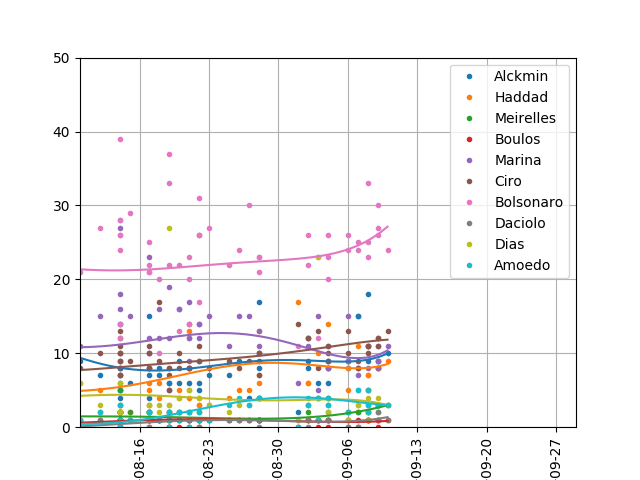

In [132]:
import matplotlib.dates as pltdat
import datetime
initData = 365*2018+336
datas = pltdat.num2date(tempo + initData)
datas2 = pltdat.num2date(tempo2 + initData)
diaDatas = pltdat.num2date(np.array(dia) + initData)
plt.figure()
plt.plot(diaDatas, Y, '.')
plt.plot(datas, VotEst)
plt.legend(np.array(candidatos))
plt.xticks(rotation='vertical')
plt.xlim(datas[0], pltdat.num2date(tempo2[-1] + 16 + initData))
plt.ylim(0,50)

plt.grid()
plt.show()

<IPython.core.display.Javascript object>


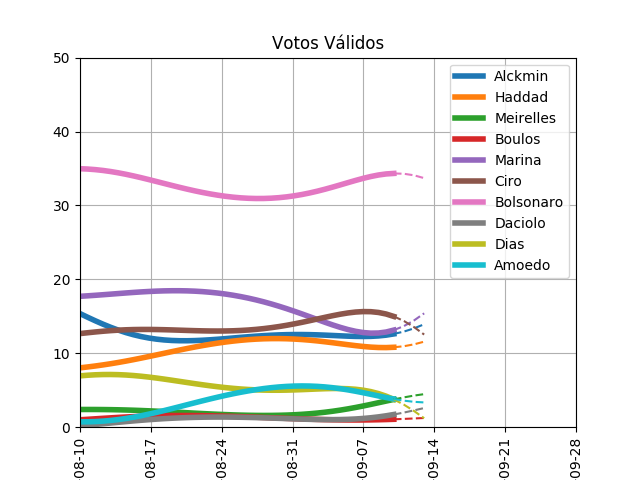

In [134]:
plt.figure()
plt.plot(datas, VotEst/np.sum(VotEst,1, keepdims=True)*100, lw = 4)
plt.plot(datas2, VotEst2/np.sum(VotEst2,1, keepdims=True)*100, '--')
plt.legend(np.array(candidatos))
plt.xticks(rotation='vertical')
plt.xlim(datas[0], pltdat.num2date(tempo2[-1] + 15 + initData))
plt.ylim(0,50)
plt.title('Votos Válidos')

plt.grid()
plt.show()

## Estimativa por média móvel

Útil para analisar a real intenção de votos de cada candidato

In [135]:
def movWeightedAvg(time, Y, weight, window):
    weightedAvg = np.zeros((max(time)+1, np.size(Y,1)))
    for i in range(0,max(time)+1):
        minLim = i - window/2
        maxLim = i + window/2
        weightedSum = 0.0
        weightsSum = 0.0
        for j in range(len(time)):
            if minLim <= time[j] <= maxLim:
                weightedSum = weightedSum + Y[j,:]*peso[j]
                weightsSum = weightsSum + peso[j]
        weightedAvg[i] = weightedSum/weightsSum
    return weightedAvg

In [136]:
tamanhoDaJanela = 7 # a média é feita com intervalo de 1 semana
VotEstMovAvg = movWeightedAvg(dia, Y, peso, tamanhoDaJanela)

<IPython.core.display.Javascript object>


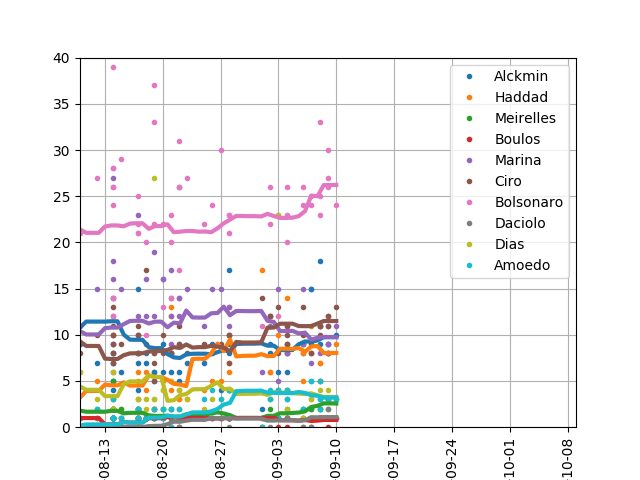

In [137]:
tempo2 = np.reshape(np.linspace(1, diaEleicao, diaEleicao),(diaEleicao,1))
plt.figure()
plt.plot(diaDatas, Y, '.')
plt.plot(datas, VotEstMovAvg, lw = 3)
plt.legend(np.array(candidatos))
plt.xticks(rotation='vertical')
plt.xlim(datas[0], pltdat.num2date(tempo2[-1] + 2 + initData))
plt.ylim(0,40)

plt.grid()
plt.show()

<IPython.core.display.Javascript object>


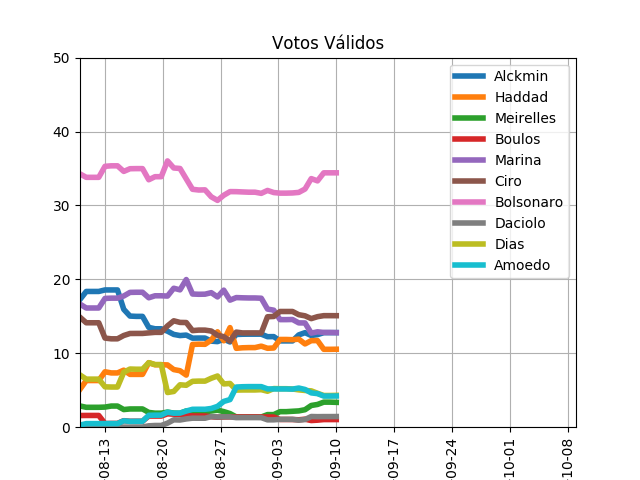

In [138]:
plt.figure()
plt.plot(datas, VotEstMovAvg/np.sum(VotEstMovAvg,1, keepdims=True)*100, lw = 4)
plt.legend(np.array(candidatos))
plt.xticks(rotation='vertical')
plt.xlim(datas[0], pltdat.num2date(tempo2[-1] + 2 + initData))
plt.ylim(0,50)
plt.title('Votos Válidos')

plt.grid()
plt.show()

In [139]:
AS = 0
CS = 0
MS = 0
HS = 0
BS = 0

for i in range(10000):
    Yincerteza = np.copy(Y)
    for j in range(Y.shape[0]):
        Yincerteza[j,:] = Y[j,:] + std[j]*np.random.randn(Y.shape[1])
    VotEstMovAvgincerteza = movWeightedAvg(dia, Yincerteza, peso, 7)
    A = VotEstMovAvgincerteza[-1,0]
    C = VotEstMovAvgincerteza[-1,5]
    M = VotEstMovAvgincerteza[-1,4]
    H = VotEstMovAvgincerteza[-1,1]
    B = VotEstMovAvgincerteza[-1,6]
    votos = np.array([A,H,M,C,B])
    primeiro = np.argmax(votos)
    votos[primeiro] = -1
    segundo = np.argmax(votos)
    if (primeiro == 0 or segundo == 0):
        AS = AS + 1
    if (primeiro == 1 or segundo == 1):
        HS = HS + 1
    if (primeiro == 2 or segundo == 2):
        MS = MS + 1
    if (primeiro == 3 or segundo == 3):
        CS = CS + 1
    if (primeiro == 4 or segundo == 4):
        BS = BS + 1
        
print('Se a eleição fosse hoje:\n ')
print('Alckmin teria ', round(AS/(CS+AS+MS+HS+BS)*200), '% de chance de ir para o segundo turno')
print('Haddad teria', round(HS/(CS+AS+MS+HS+BS)*200), '% de chance de ir para o segundo turno')
print('Ciro teria', round(CS/(CS+AS+MS+HS+BS)*200), '% de chance de ir para o segundo turno')
print('Marina teria', round(MS/(CS+AS+MS+HS+BS)*200), '% de chance de ir para o segundo turno')
print('Bolsonaro teria ', round(BS/(CS+AS+MS+HS+BS)*200), '% de chance de ir para o segundo turno')

Se a eleição fosse hoje:
 
Alckmin teria  0 % de chance de ir para o segundo turno
Haddad teria 0 % de chance de ir para o segundo turno
Ciro teria 99 % de chance de ir para o segundo turno
Marina teria 0 % de chance de ir para o segundo turno
Bolsonaro teria  100 % de chance de ir para o segundo turno
